# Relational Databases Overview

For a simple tutorial on database design, see [Introduction to Database Design](https://www.datanamic.com/support/lt-dez005-introduction-db-modeling.html)

For a deep dive, see [Database Design for Mere Mortals](https://www.amazon.com/Database-Design-Mere-Mortals-Hands/dp/0321884493/ref=dp_ob_title_bk)

## 0. Packages for working with relational databases in Python

- [Python Database API Specification v2.0](https://www.python.org/dev/peps/pep-0249/) - The standard Python Database API
- [sqlite3](https://docs.python.org/3.7/library/sqlite3.html) - API for builit-in `sqlite3` package
- [Database drivers](https://github.com/vinta/awesome-python#database-drivers) - For connecting to other databases
- [ipython-sql](https://github.com/catherinedevlin/ipython-sql) - SQL magic in Jupyter
- [SQLAlchemy](https://www.sqlalchemy.org) - Most well-known Object Relational Mapper (ORM)

## Motivation

Why relational databases and SQL?

- History of databases
- ACID
- Data integrity
- Schema

## RDBMS

- Memory
- Storage
- Dictionary
- Query language

## What is a database?

A database contains tables with rows and columns. Tables belong to a schema. Schemas belong to a catalog. In other words, a database contains catalogs that contain schemas that contain tables (or views). Most simple database only consider the schema/table part of the hierarchy.

### Schema

Represents a collection of tables.

### Table (Relation)

There are two definitions of `relation` - in one, relation is a synonym for table, in the other, a relation describes how two tables are connected via foreign/primary keys.

Represents a *subject* or an *event*.

### Column (Attribute)

Represents a single *variable* or *feature*.

### Row (Tuple)

Represents an *observation*.

## Concepts

### Constraints

You can impose constraints that values in a column have to take. For example, you can specify that values are compulsory (NOT NULL), or UNIQUE or fall within a certain range.

### Referential integrity

- Primary key represents a unique identifier of a row. It may be simple or composite.
  - Unique
  - Non-null
  - Never optional
- Foreign key is a column containing the primary key of a different table. It enforces *referential integrity*.

### Relationships

- One to one
- One to many
- Many to many

- What happens on delete?
  - Restrict
  - Cascade

### Indexes

An index is a data structure that allows fast search of a column (typically from linear to log time complexity). Most databases will automatically build an index for every primary key column, but you can also manually specify columns to build indexes for. 

### Views

- Temporary virtual table retuned as a result of a *query*.
- Views only specify the strucutre of a table - the contents are constructed on the fly from existing tables.
- Queries return a Result Set

## Design

### Columns

- Use singlular form for name 
- Use informative names
- Use unique names not shared by any other table (except foreign keys)
- Column must be an attribute of the table's subject
- Eliminate multi-part columns
- Eliminate multi-value columsn
- Eliminate redundant columns

### Tables

- Use singular/plural forms for name (controversial)
- Enusre every table has a primary key
- Eliminate duplicate columns

### Relationships

- Establish participation type and degree of relationship
  - One to one
  - One to many
  - Many to many

![](erd_from_sqlalchemy.png)

## Database administration

Use `sqlmagic` as interface to `sqlite3` driver.

In [1]:
%%capture
! python3 -m pip install --quiet ipython-sql

In [2]:
%load_ext sql

Connect to SQLite3 database on disk (creates it if it does not exist)

In [6]:
%sql sqlite:///Chinook.db

'Connected: @Chinook.db'

### SQL for table deletion and creation

In [7]:
%%sql

DROP TABLE IF EXISTS Country;
DROP TABLE IF EXISTS Person;

CREATE TABLE Country (
    country_id varcarh(2) PRIMARY KEY,
    country_name varchar(255)
);

CREATE TABLE Person (
    person_id INTEGER PRIMARY KEY,
    person_first varchar(255),
    person_last varchar(255),
    country_id INTEGER NOT NULL,
      FOREIGN KEY (country_id) REFERENCES Country(country_id)
);

 * sqlite:///Chinook.db
Done.
Done.
Done.
Done.


[]

### Accessing the RDBMS data dictionary.

In [8]:
%%sql

SELECT name FROM sqlite_master 
WHERE type = "table";

 * sqlite:///Chinook.db
Done.


name
Country
Person


In [9]:
%%sql

SELECT sql FROM sqlite_master 
WHERE name='Person';

 * sqlite:///Chinook.db
Done.


sql
"CREATE TABLE Person ( person_id INTEGER PRIMARY KEY, person_first varchar(255), person_last varchar(255), country_id INTEGER NOT NULL, FOREIGN KEY (country_id) REFERENCES Country(country_id))"


## CRUD

#### Create

SQL to insert rows.

In [10]:
%%sql

INSERT INTO Country(country_id, country_name) 
VALUES ('FR', 'France'), ('CU', 'CUBA');

 * sqlite:///Chinook.db
2 rows affected.


[]

In [11]:
%%sql

INSERT INTO Person(person_first, person_last, country_id) 
VALUES 
('Napolean', 'Bonaparte', 'FR'),
('Luis','Alvarez', 'CU');

 * sqlite:///Chinook.db
2 rows affected.


[]

#### Read

Read rows.

SQL as a Query Language.

In [12]:
%%sql

SELECT *
FROM Person

 * sqlite:///Chinook.db
Done.


person_id,person_first,person_last,country_id
1,Napolean,Bonaparte,FR
2,Luis,Alvarez,CU


In [13]:
%%sql

SELECT person_first as first, person_last AS last, country_name AS nationality
FROM Person 
INNER JOIN country 
ON Person.country_id = Country.country_id;

 * sqlite:///Chinook.db
Done.


first,last,nationality
Napolean,Bonaparte,France
Luis,Alvarez,CUBA


#### Update

In [14]:
%%sql

UPDATE 
FROM Person
SET person_first = 'Walter' 
WHERE person_last = 'Alvarez'

 * sqlite:///Chinook.db
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: UPDATE 
FROM Person
SET person_first = 'Walter' 
WHERE person_last = 'Alvarez']
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [15]:
%%sql

SELECT * from person

 * sqlite:///Chinook.db
Done.


person_id,person_first,person_last,country_id
1,Napolean,Bonaparte,FR
2,Luis,Alvarez,CU


#### Delete

In [16]:
%%sql

DELETE 
FROM Person
WHERE person_last = 'Alvarez'

 * sqlite:///Chinook.db
1 rows affected.


[]

In [17]:
%%sql

SELECT * from person

 * sqlite:///Chinook.db
Done.


person_id,person_first,person_last,country_id
1,Napolean,Bonaparte,FR


### Communicating with database without magic

In [18]:
import sqlite3

In [21]:
con = sqlite3.connect('Chinook.db')

In [22]:
c = con.cursor()

In [23]:
c.execute('select * from Person')
c.fetchall()

[(1, 'Napolean', 'Bonaparte', 'FR')]

In [24]:
c.close()
con.close()

### Communicating with database from `pandas`

In [25]:
import pandas as pd

In [26]:
con = sqlite3.connect('Chinook.db')
sql = """
SELECT * 
FROM Person
"""
df = pd.read_sql(sql, con)

In [27]:
df

,person_id,person_first,person_last,country_id
0,1,Napolean,Bonaparte,FR


In [28]:
con.close()

## Database normalization

Database normalization is performed for two main reasons - reduce redundancy and prevent inconsistencies on insert/update/delete. 

Note: A fully normalized database is in domain-key normal form (DK/NF) if every constraint is a logical consequence of the definition of the candidate key and domains. However, most practical normalization procedures go through a series of steps known as first, second and third normal forms, and ignore potential modification anomalies that may remain.

In [29]:
import pandas as pd

### First Normal Form (1NF)

1. Table has a primary key (unique, non-null column that identifies each row)
2. No repeating groups of columns
3. Each cell contains a single value

#### No repeating columns

In [30]:
names = ['ann', 'bob', 'charles']
grades = [(78,57), (99, 99), (67, 98)]
grade1, grade2 = zip(*grades)
df = pd.DataFrame(dict(name=names, grade1=grade1, grade2=grade2))
df

,name,grade1,grade2
0,ann,78,57
1,bob,99,99
2,charles,67,98


In [31]:
df = pd.melt(df, id_vars='name', 
             var_name='homework', 
             value_name='grade')
df

,name,homework,grade
0,ann,grade1,78
1,bob,grade1,99
2,charles,grade1,67
3,ann,grade2,57
4,bob,grade2,99
5,charles,grade2,98


In [32]:
df.homework = df.homework.str.extract('.*(\d+)$')
df

,name,homework,grade
0,ann,1,78
1,bob,1,99
2,charles,1,67
3,ann,2,57
4,bob,2,99
5,charles,2,98


#### Each column contains a single value

In [33]:
names = ['ann', 'bob', 'charles']
grades = [(78,57), (99, 99), (67, 98)]
df = pd.DataFrame(dict(name=names, grade=grades))
df

,name,grade
0,ann,"(78, 57)"
1,bob,"(99, 99)"
2,charles,"(67, 98)"


In [34]:
df.explode('grade').reset_index(drop=True)

,name,grade
0,ann,78
1,ann,57
2,bob,99
3,bob,99
4,charles,67
5,charles,98


### Second Normal Form (2NF)

1. All columns in each row depend fully on candidate keys

This can be quite tricky to understand. Look for candidate composite keys that can uniquely identify a row. Then see if the other columns depend on ALL columns of the composite key.

In the example below, suppose we have a table for academic books. Note that (publisher, title) is a candidate key. However, headquarters depends only on publisher and not on title, so this violates 2NF.

In [35]:
import numpy as np

In [36]:
publishers = ['Springer', 'Springer', 'CUB', 'CUP']
headquarters = ['Germany', 'Gernamy', 'England', 'England']
titles = ['Linear Algebra Done Wrong', 
          'Undergraduate Algebra',
          'Stochastic Modelling of Reaction–Diffusion Processes',
          'An Introduction to Stochastic Dynamics']
df = pd.DataFrame(dict(publisher=publishers, 
                       headquarter=headquarters, 
                       title=titles))
df

,publisher,headquarter,title
0,Springer,Germany,Linear Algebra Done Wrong
1,Springer,Gernamy,Undergraduate Algebra
2,CUB,England,Stochastic Modelling of Reaction–Diffusion Pro...
3,CUP,England,An Introduction to Stochastic Dynamics


In [37]:
publisher_ids = [0, 0, 1, 1]
titles = ['Linear Algebra Done Wrong', 
          'Undergraduate Algebra',
          'Stochastic Modelling of Reaction–Diffusion Processes',
          'An Introduction to Stochastic Dynamics']
df1 = pd.DataFrame(dict(title=titles, publisher_id=publisher_ids))
df1

,title,publisher_id
0,Linear Algebra Done Wrong,0
1,Undergraduate Algebra,0
2,Stochastic Modelling of Reaction–Diffusion Pro...,1
3,An Introduction to Stochastic Dynamics,1


In [38]:
publishers = ['Springer', 'CUP']
headquarters = ['Germany', 'England']
df2 = pd.DataFrame(dict(publisher=publishers, 
                       headquarter=headquarters))
df2

,publisher,headquarter
0,Springer,Germany
1,CUP,England


### Third Normal Form (3NF)

1. No transitive dependencies between non-candidate columns

In the table below, both major and major_description depend on the name (or row number), but major_description only depends on name via the major. This is a transitive dependency and violates 3NF.

In [39]:
names = ['ann', 'bob', 'charles', 'david']
ages = [21, 22, 21, 23]
majors = ['math', 'stats', 'bio', 'math']
major_descriptions = ['Mathematics', 'Statisitcs', 'Biohazards in the University', 'Mathematics']
df = pd.DataFrame(dict(name=names, age=ages, major=majors, major_dscription=major_descriptions))
df

,name,age,major,major_dscription
0,ann,21,math,Mathematics
1,bob,22,stats,Statisitcs
2,charles,21,bio,Biohazards in the University
3,david,23,math,Mathematics


In [40]:
names = ['ann', 'bob', 'charles', 'david']
ages = [21, 22, 21, 23]
major_ids = [0,1,2, 0]
df1 = pd.DataFrame(dict(name=names, age=ages, major=major_ids))
df1

,name,age,major
0,ann,21,0
1,bob,22,1
2,charles,21,2
3,david,23,0


In [41]:
majors = ['math', 'stats', 'bio']
major_descriptions = ['Mathematics', 'Statisitcs', 'Biohazards in the University']
df2 = pd.DataFrame(dict(major=majors, description=major_descriptions))
df2

,major,description
0,math,Mathematics
1,stats,Statisitcs
2,bio,Biohazards in the University


## OLTP and OLAP

- OLTP
    - Normalized schema
- OLAP **(better for DS because requires less joins to get shit done)**
    - Denormalized schema
        - Star
            - Facts
            - Dimensions
        - Snowflake 
        - Generated from OLTP databases by ETL (Extract-Transform-Load) operations

### Denormalized schemas
    
- Data lake
- Data warehouse
- Data mart        
        
Data marts typically use a star schema that is customized for the analysis needs. For example, the finance department in a hospital may be most interested in Facts about Claims.

These schemas are generally designed to reduce the need for complex joins and return queries efficiently. Generally, there is an Extract Transform Load (ETL) script that periodically batch converts data entered into an OLTP database into such a star schema on an OLAP data mart or warehouse.
        
![img](https://www.researchgate.net/profile/Hugh_Watson3/publication/239823035/figure/fig2/AS:375035886882819@1466426931869/A-Star-Schema-for-Health-Care-courtesy-of-Arthur-Andersen.png)

## Generating ER diagrams

Visualizing the entitry-relationship diagram (ERd).

In [42]:
%%capture
! python3 -m pip install --quiet eralchemy

In [44]:
import os
from eralchemy import render_er

if not os.path.exists('erd_from_sqlalchemy.png'):
    render_er('sqlite:///Chinook.db', 'erd_from_sqlalchemy.png')

In [45]:
from IPython.display import Image

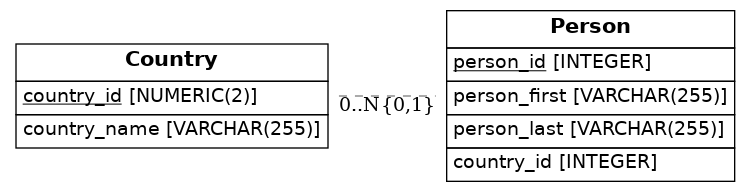

In [46]:
Image('erd_from_sqlalchemy.png')

## Robustness and scaling

As the database grows, it may be necessary to scale your system. In vertical scaling, you get a machine with more resources (more disk space, more RAM, more CPUs). This is obviously limited and quickly becomes prohibitively expensive. In horizontal scaling, you add more (commodity) machines to grow. Two concepts important for horizontal scaling are **replication** and **sharding**.

In **replication**, you duplicate the entire database over multiple machines. This does not do anything to make your queries faster, but increases robustness since there is no longer a single point of failure.

In **sharding** you divide the rows of your tables into partitions that are distributed over different machines. This can improve query efficiency since queries can be run in parallel.

Sharing is also known as horizontal partitioning. In vertical partitioning, you split the columns into partitions. Generally for relational databases, vertical partitioning is hard to achieve unless there is some natural domain specific way to logically split the data.

Sharding is technically challenging to achieve with relational databases, and the need to perform horizontal scaling as data sets grew exponentially was a major driver in the development of NoSQL systems.